In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

rng = Random.default_rng();


In [53]:
n_v = 20
noise = 0.1
p_edge = 0.3
p_triangles = 0.5

planted_score = randperm(rng,n_v)

meta_g = gen_graph_planted_triangles(rng, n_v, noise, p_edge, p_triangles; planted_score=nothing)

566


{20, 190} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

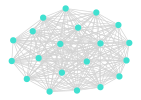

In [54]:
gplot(meta_g)

In [55]:
# number of batches and MC runs
n_batch = 7;
n_rep = 5; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);

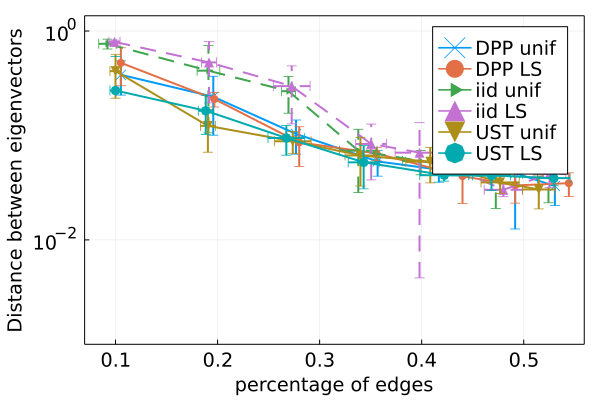

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


In [56]:
metric= "err" #"spear" #"tau" #"err"
y_limits = (1e-3, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_all,y_limits;legendposition)

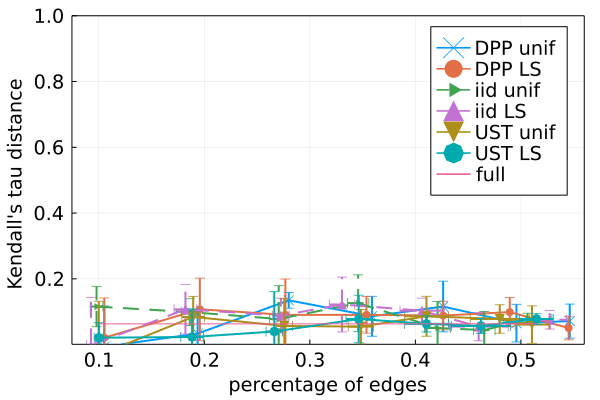

In [52]:
metric= "tau" #"spear" #"tau" #"err"
y_limits = (1e-3, 1)
legendposition=:topright
plot_comparison_sync(metric,D_all,y_limits;legendposition)

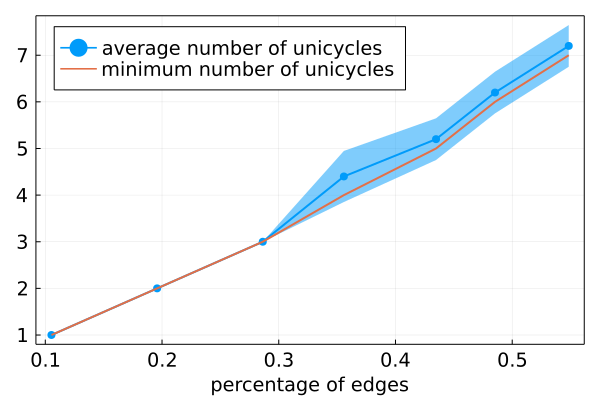

In [44]:
method = "DPP LS"
legendposition=:topleft
plot_nb_cycles(D_all,method;legendposition)